<figure>
  <IMG SRC="https://gitlab.tudelft.nl/mude/public/-/raw/main/tu-logo/TU_P1_full-color.png" WIDTH=200 ALIGN="right">
</figure>
<figure>
  <IMG SRC="https://gitlab.tudelft.nl/mude/public/-/raw/main/mude-logo/MUDE_Logo-small.png" WIDTH=200 ALIGN="right">
</figure>

# CEGM1000 Modelling, Uncertainty and Data for Engineers
    
## Sensing and observation theory - hypothesis testing

In this notebook you will fit several models to a time series of height observations of a  point on a glacier, to assess whether it is melting. 

It is the same problem as we used in the notebook in the chapter on Weighted least-squares.

You will apply a statistical test to decied between two different models to describe the ice melt as function of time.

You have 12 monthly measurements of the height of a point on a glacier. The measurements are obtained from a satellite laser altimeter.

- Time [months]: ```t``` $=[0, 1, 2, \ldots, 11]$
- Observed heights [meters]: ```y``` $=[102.4, 98.2, 97.5, 97.9, 99.7, 100.7, 98.3, 94.2, 90.9, 86.1, 81.2, 76.9]$

We will consider three different models, with the following observation equations:

- Model 1: constant velocity, $\mathbb{E}\left( Y_i \right) = x_0 + x_1 t_i$
- Model 2: constant velocity + annual signal, $\mathbb{E}\left( Y_i \right) = x_0 + x_1 t_i + x_2 cos \Big(\frac{2 \pi t_i}{12} \Big)$

The observation are independent and have a precision of 1 m.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.stats.distributions import chi2
%matplotlib inline

### Observed heights and times of observations

Times of observations ```t```, observed heights ```y```, and number of observations ```m``` are given:

In [2]:
t = np.arange(12)
y = np.array([102.4, 98.2, 97.5, 97.9, 99.7, 100.7, 
               98.3, 94.2, 90.9, 86.1, 81.2, 76.9])
m = len(t)



### Create design matrices for the two models

With ```column_stack``` you can combine arrays (column vectors) to create a matrix.

In [9]:
A_1 = np.column_stack((np.ones(m), t))
A_2 = np.column_stack((np.ones(m), t, np.cos(2*np.pi*t/12)))

### Apply best linear unbiased estimation for each of the models
Note that $\Sigma_Y=I_m$ in this case, so it disappears from the equations.

In [4]:
xhat_1 = np.linalg.inv(A_1.T @ A_1) @ A_1.T @ y
xhat_2 = np.linalg.inv(A_2.T @ A_2) @ A_2.T @ y
yhat_1 = A_1 @ xhat_1
yhat_2 = A_2 @ xhat_2
ehat_1 = y - A_1 @ xhat_1
ehat_2 = y - A_2 @ xhat_2

eTe_1 = ehat_1.T @ ehat_1
eTe_2 = ehat_2.T @ ehat_2

### Plot with observations and the fitted models

The squared norm of residuals is equal to $\hat{\epsilon}^T \Sigma_Y^{-1} \hat{\epsilon}$.

Squared norm of residuals for model 1: 176.066
Squared norm of residuals for model 2: 9.998


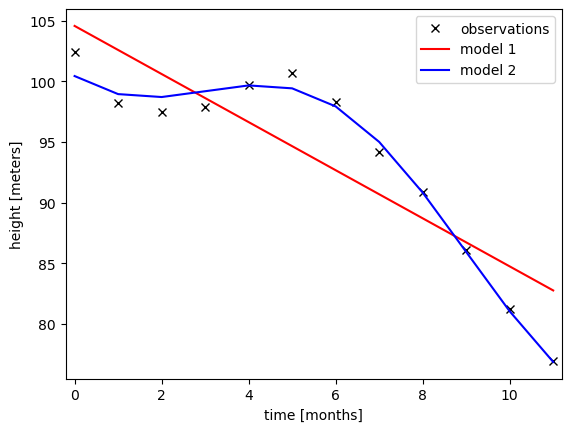

In [5]:
print(f'Squared norm of residuals for model 1: {eTe_1:.3f}')
print(f'Squared norm of residuals for model 2: {eTe_2:.3f}')

plt.figure()
plt.plot(t, y, 'kx', label='observations')
plt.plot(t, yhat_1, color='r', label='model 1')
plt.plot(t, yhat_2, color='b', label='model 2')
plt.xlim(-0.2, (m-1)+0.2)
plt.xlabel('time [months]')
plt.ylabel('height [meters]')
plt.legend(loc='best')
plt.show()

### Apply the generalized likelihood ratio test
The null hypothesis is that the linear trend model is applicable; the alternative hypothesis is that the linear trend + annual signal model is correct. Implement the test to decide whether the null hypothesis is accepted, or rejected in favor of the alternative hypothesis. Use a false alarm probability of 0.025.

#### Generalized likelihood ratio test:

Accept alternative hypothesis and reject null hypothesis if: $T_q = \hat{\epsilon}^T\Sigma_Y^{-1}\hat{\epsilon}-\hat{\epsilon}_a^T\Sigma_Y^{-1}\hat{\epsilon}_a > k_{\alpha}$

First calculate the threshold value ```k``` $=k_{\alpha}$. Recall that $T_q \sim \chi^2(q,0)$, where $q$ is the number of *extra* parameters in the alternative hypothesis. You can use
<a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2.html" target="_blank">chi2.ppf</a> from SciPy. 

Then calculate the test statistic value ```Tq``` $=T_q$.

In [7]:
alpha = 0.025
k = ?

In [8]:
Tq = ?

if ?:
    print(f'Test statistic = {Tq:.2f}\n')
    print(f'Threshold value = {k:.2f}\n')
    print('Null hypothesis rejected, Alternative hypothesis accepted')
else:
    print(f'Test statistic = {Tq:.2f}\n')
    print(f'Threshold value = {k:.2f}\n')
    print('Null hypothesis accepted')    

Test statistic = 166.07

Threshold value = 5.02

Null hypothesis rejected, Alternative hypothesis accepted


<b>As we could have guessed from the figure, model 2 (linear trend + annual signal) provides a much better fit. In many practical situations it may be less obvious whether a model fits significantly better than the null hypothesis, and the general likelihood test provides a statistical test to assess this.</b>

### Challenge: 

Try to come up with another model with at most 4 parameters, and then:
1. set-up the $\mathrm{A}$-matrix, 
2. apply BLUE, 
3. compute the sum of squared residuals $\hat{\epsilon}^T \Sigma_Y^{-1} \hat{\epsilon}$ for that model
4. apply the GLRT with model 2 as null hypothesis, and your model as alternative hypothesis.